In [5]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [6]:
mnist = tf.keras.datasets.mnist

In [7]:
(x_train, y_train), (x_test, y_test)=mnist.load_data()

In [8]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


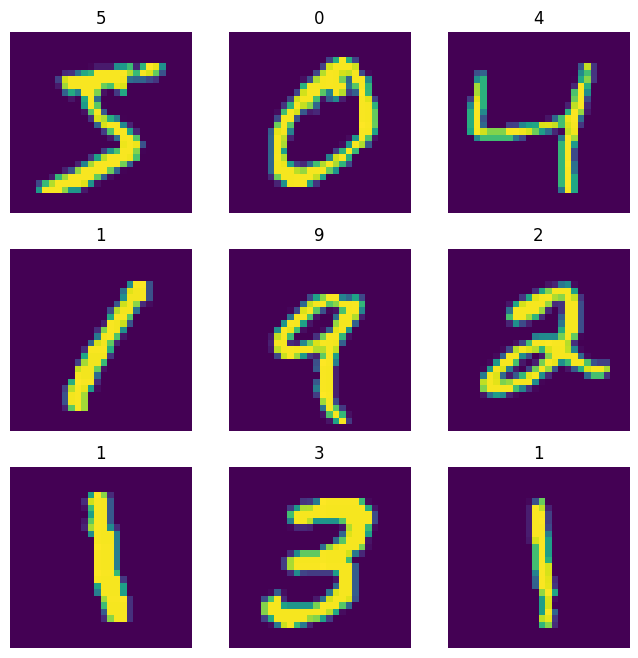

In [9]:
plt.figure(figsize=(8,8))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(x_train[i])
  plt.title(y_train[i])
  plt.axis('off')

In [10]:
x_train = tf.keras.utils.normalize(x_train, axis = 0)
x_test = tf.keras.utils.normalize(x_test, axis = 0)

In [11]:
import tensorflow as tf

model = tf.keras.Sequential()

model.add(tf.keras.layers.Flatten(input_shape = (28, 28)))
model.add(tf.keras.layers.Dense(128, activation = 'relu'))
model.add(tf.keras.layers.Dense(64, activation = 'relu'))
model.add(tf.keras.layers.Dense(32, activation = 'relu'))
model.add(tf.keras.layers.Dense(128, activation = 'softmax'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 128)               4224      
                                                                 
Total params: 115040 (449.38 KB)
Trainable params: 115040 (449.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])


In [14]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=32, epochs=15)

Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 [==============================] - 8s 4ms/step - loss: 0.9552 - accuracy: 0.7038 - val_loss: 0.5283 - val_accuracy: 0.8814
Epoch 2/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3395 - accuracy: 0.8981 - val_loss: 0.4198 - val_accuracy: 0.9074
Epoch 3/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2575 - accuracy: 0.9237 - val_loss: 0.3529 - val_accuracy: 0.9215
Epoch 4/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2100 - accuracy: 0.9364 - val_loss: 0.2803 - val_accuracy: 0.9386
Epoch 5/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1752 - accuracy: 0.9473 - val_loss: 0.2594 - val_accuracy: 0.9446
Epoch 6/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1490 - accuracy: 0.9544 - val_loss: 0.2367 - val_accuracy: 0.9532
Epoch 7/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1296 - accuracy: 0.9601 - val_loss: 0.2457 - val_accuracy: 0.9504
Epo

In [21]:
import cv2

In [27]:
image = cv2.imread('/content/9.png')[:,:, 0]
image = np.invert(np.array([image]))

1/1 [==============================] - 0s 18ms/step


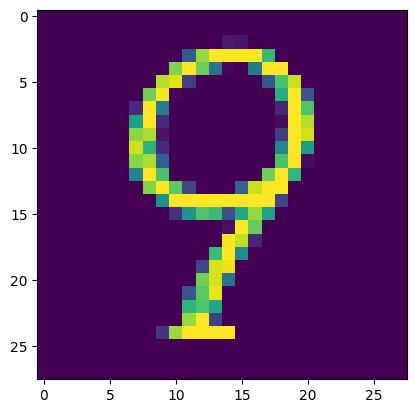

8


In [28]:
output = model.predict(image)
plt.imshow(image[0])  # Assuming the image is grayscale, otherwise adjust the cmap
plt.show()
print(np.argmax(output))


In [29]:
model.save('/content/hand_written_Digitis_recog_model.keras')